# import module

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import dataset

In [122]:
df = pd.read_csv("spotify_dataset.csv", encoding = "ISO-8859-1")

df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",MÃ¥neskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [123]:
print(df.shape)

print(df.columns)

# Drop irrelevant columns from the dataset


# Printing the count of each datattype
print(df.dtypes.value_counts())

#Identifying all the columns of datatype = Object
print(df.select_dtypes(include=['object']).columns)

df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')
df['Artist Followers'] = pd.to_numeric(df['Artist Followers'], errors='coerce').fillna(0).astype(np.int64)
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Danceability'] = pd.to_numeric(df['Danceability'], errors='coerce')
df['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')
df['Loudness'] = pd.to_numeric(df['Loudness'], errors='coerce')
df['Speechiness'] = pd.to_numeric(df['Speechiness'], errors='coerce')
df['Acousticness'] = pd.to_numeric(df['Acousticness'], errors='coerce')
df['Liveness'] = pd.to_numeric(df['Liveness'], errors='coerce')
df['Tempo'] = pd.to_numeric(df['Tempo'], errors='coerce')
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')
df['Artist Followers'] = pd.to_numeric(df['Energy'], errors='coerce')
df['Valence'] = pd.to_numeric(df['Valence'], errors='coerce')

print(df.dtypes)


(1556, 23)
Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')
object    20
int64      3
dtype: int64
Index(['Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')
Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                  

# handle column yang kosong

In [124]:
#Check for null values int he overall dataset
print(df.isnull().sum().sum())  

# Identify column names with null values
df.loc[:, df.isnull().any()].columns
print(df.describe())

1677
             Index  Highest Charting Position  Number of Times Charted  \
count  1556.000000                1556.000000              1556.000000   
mean    778.500000                  87.744216                10.668380   
std     449.322824                  58.147225                16.360546   
min       1.000000                   1.000000                 1.000000   
25%     389.750000                  37.000000                 1.000000   
50%     778.500000                  80.000000                 4.000000   
75%    1167.250000                 137.000000                12.000000   
max    1556.000000                 200.000000               142.000000   

       Streams  Artist Followers   Popularity  Danceability       Energy  \
count      0.0       1545.000000  1545.000000   1545.000000  1545.000000   
mean       NaN          0.633495    70.089320      0.689997     0.633495   
std        NaN          0.161577    15.824034      0.142444     0.161577   
min        NaN          

Text(0.5, 1.0, 'Top artist weekly precentage spotify')

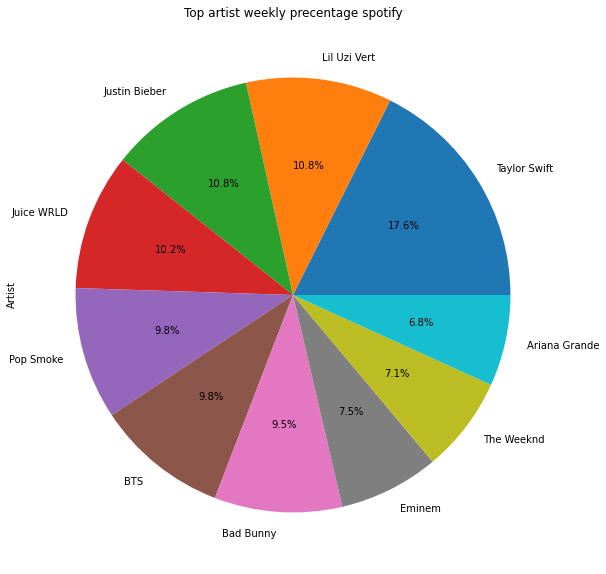

In [126]:
df['Artist'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')# 1 angka dibelakang koma, dengan tipe data float
plt.title('Top artist weekly precentage spotify')

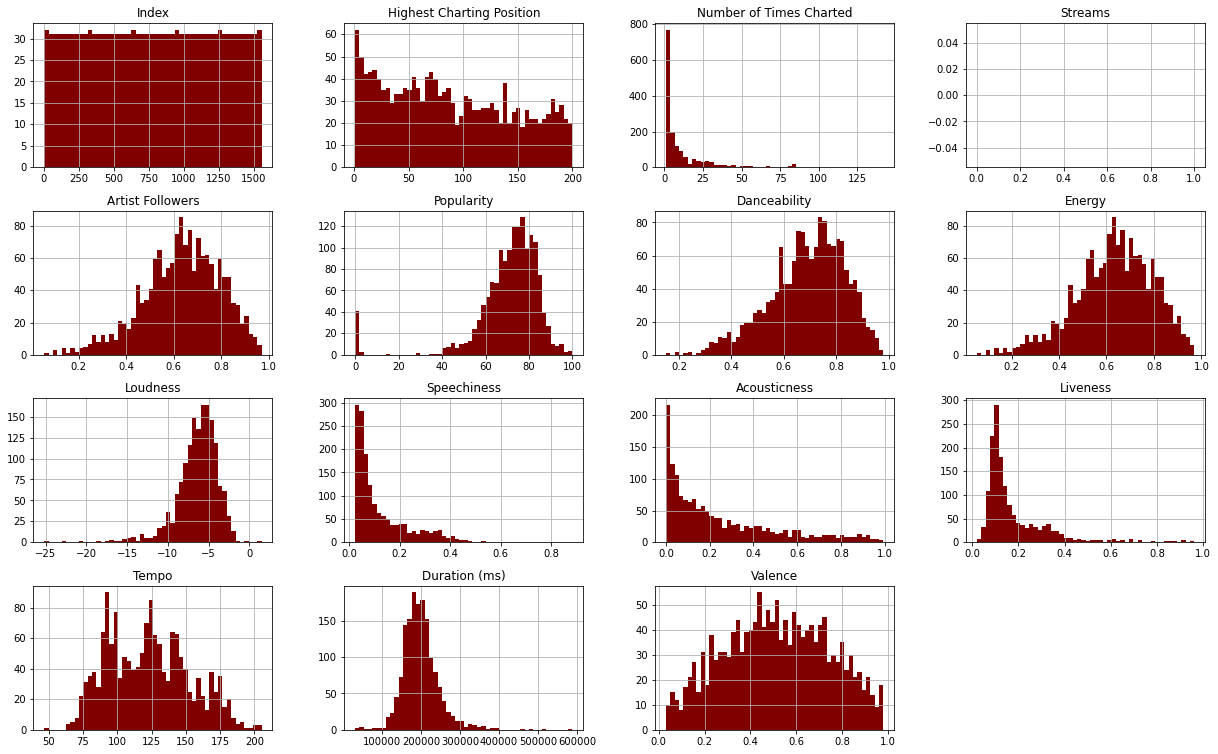

In [127]:
df.hist(bins = 50, figsize= (21,13), color = 'maroon');